Analyses properties of decorrelation and whitening methods for decorrelated networks

In [5]:
import numpy as np
import torch
import torch.nn as nn
from decorrelation.decorrelation import Decorrelation, DecorLinear, DecorConv2d
import matplotlib.pyplot as plt
import matplotlib
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader, Subset
from decorrelation.utils import decor_train
import argparse
from decorrelation.plotting import *

# automatic reloading of modules when they change
%load_ext autoreload
%autoreload 2

seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Grayscale(1),
        transforms.Normalize((0.5), (0.5)),
        # torch.flatten # not necessary but useful for debugging
        ])

train_data = MNIST(root='~/Data', train=True, download=True, transform=transform)
train_data = Subset(train_data, np.random.permutation(len(train_data.data))[:1000])
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0, drop_last=True)

epoch 0  	time:0.000 s	bp loss: 2.473516	decorrelation loss: 7.550481	test loss: 0.000000
epoch 1  	time:0.650 s	bp loss: 2.473282	decorrelation loss: 50.720466	test loss: 0.000000
epoch 2  	time:0.651 s	bp loss: 2.467220	decorrelation loss: 1519.084500	test loss: 0.000000
epoch 3  	time:0.638 s	bp loss: 2.421450	decorrelation loss: 1706.753952	test loss: 0.000000
epoch 4  	time:0.638 s	bp loss: 2.057905	decorrelation loss: 71313.386979	test loss: 0.000000
epoch 5  	time:0.632 s	bp loss: 1.742035	decorrelation loss: 149580.416440	test loss: 0.000000
epoch 6  	time:0.635 s	bp loss: 1.520459	decorrelation loss: 498704.962489	test loss: 0.000000
epoch 7  	time:0.636 s	bp loss: 1.417779	decorrelation loss: 505062.494412	test loss: 0.000000
epoch 8  	time:0.635 s	bp loss: 1.320832	decorrelation loss: 1177111.163648	test loss: 0.000000
epoch 9  	time:0.650 s	bp loss: 1.291198	decorrelation loss: 976252.750931	test loss: 0.000000
epoch 10 	time:0.638 s	bp loss: 1.238957	decorrelation loss: 82

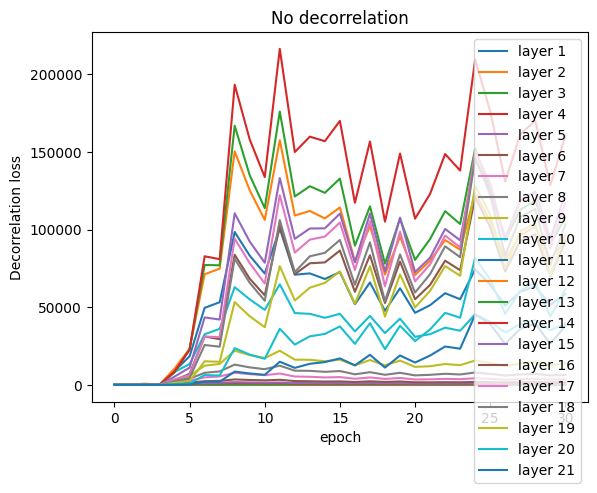

In [7]:
class Model(nn.Sequential):
    def __init__(self, in_features, num_hidden, num_hidden_layers, args):
        layers = [DecorLinear(in_features, num_hidden, decor_lr=args.decor_lr, kappa=args.kappa)]
        for _ in range(num_hidden_layers-1):
            layers.append(DecorLinear(num_hidden, num_hidden, decor_lr=args.decor_lr, kappa=args.kappa))
        layers.append(DecorLinear(num_hidden, 10, decor_lr=args.decor_lr, kappa=args.kappa))

        super().__init__(*layers)

    def forward(self, x):
        return super().forward(x.view(len(x), -1))
    

lossfun = torch.nn.CrossEntropyLoss().to(device)

args = argparse.Namespace(lr=1e-3, decor_lr=0, kappa=1e-2, epochs=30)
model = Model(784, num_hidden=20, num_hidden_layers=20, args=args).to(device)
model, train_loss, test_loss, D, T  = decor_train(args, model, lossfun, train_loader, device=device)

plt.plot(D)
plt.legend([f'layer {i}' for i in range(1, len(D)+1)])
plt.title('No decorrelation')
plt.xlabel('epoch')
plt.ylabel('Decorrelation loss');

epoch 0  	time:0.000 s	bp loss: 2.479874	decorrelation loss: 7.691732	test loss: 0.000000
epoch 1  	time:0.671 s	bp loss: 2.472928	decorrelation loss: 1.115654	test loss: 0.000000
epoch 2  	time:0.651 s	bp loss: 2.375013	decorrelation loss: 1.309577	test loss: 0.000000
epoch 3  	time:0.660 s	bp loss: 2.092449	decorrelation loss: 4.697730	test loss: 0.000000
epoch 4  	time:0.658 s	bp loss: 1.885047	decorrelation loss: 15.220930	test loss: 0.000000
epoch 5  	time:0.663 s	bp loss: 1.842829	decorrelation loss: 21.365938	test loss: 0.000000
epoch 6  	time:0.653 s	bp loss: 1.859640	decorrelation loss: 18.654195	test loss: 0.000000
epoch 7  	time:0.658 s	bp loss: 1.768893	decorrelation loss: 19.581311	test loss: 0.000000
epoch 8  	time:0.641 s	bp loss: 1.778647	decorrelation loss: 20.913787	test loss: 0.000000
epoch 9  	time:0.637 s	bp loss: 1.790084	decorrelation loss: 20.745055	test loss: 0.000000
epoch 10 	time:0.635 s	bp loss: 1.715543	decorrelation loss: 18.672311	test loss: 0.000000
epo

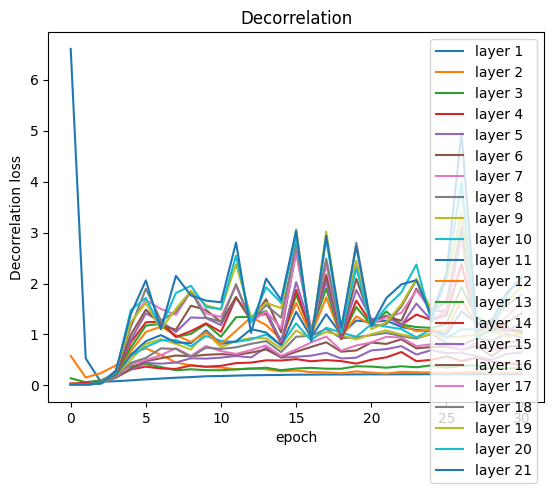

In [8]:
args = argparse.Namespace(lr=1e-3, decor_lr=1e0, kappa=1e-2, epochs=30)
model = Model(784, num_hidden=20, num_hidden_layers=20, args=args).to(device)
model, train_loss, test_loss, D, T  = decor_train(args, model, lossfun, train_loader, device=device)

plt.plot(D)
plt.legend([f'layer {i}' for i in range(1, len(D)+1)])
plt.title('Decorrelation')
plt.xlabel('epoch')
plt.ylabel('Decorrelation loss');